# Assignment is at the bottom! 

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


from sklearn.linear_model import LogisticRegression as Model


In [2]:
y = np.concatenate([np.zeros(10), np.ones(10)])
x = np.linspace(0, 10, len(y))


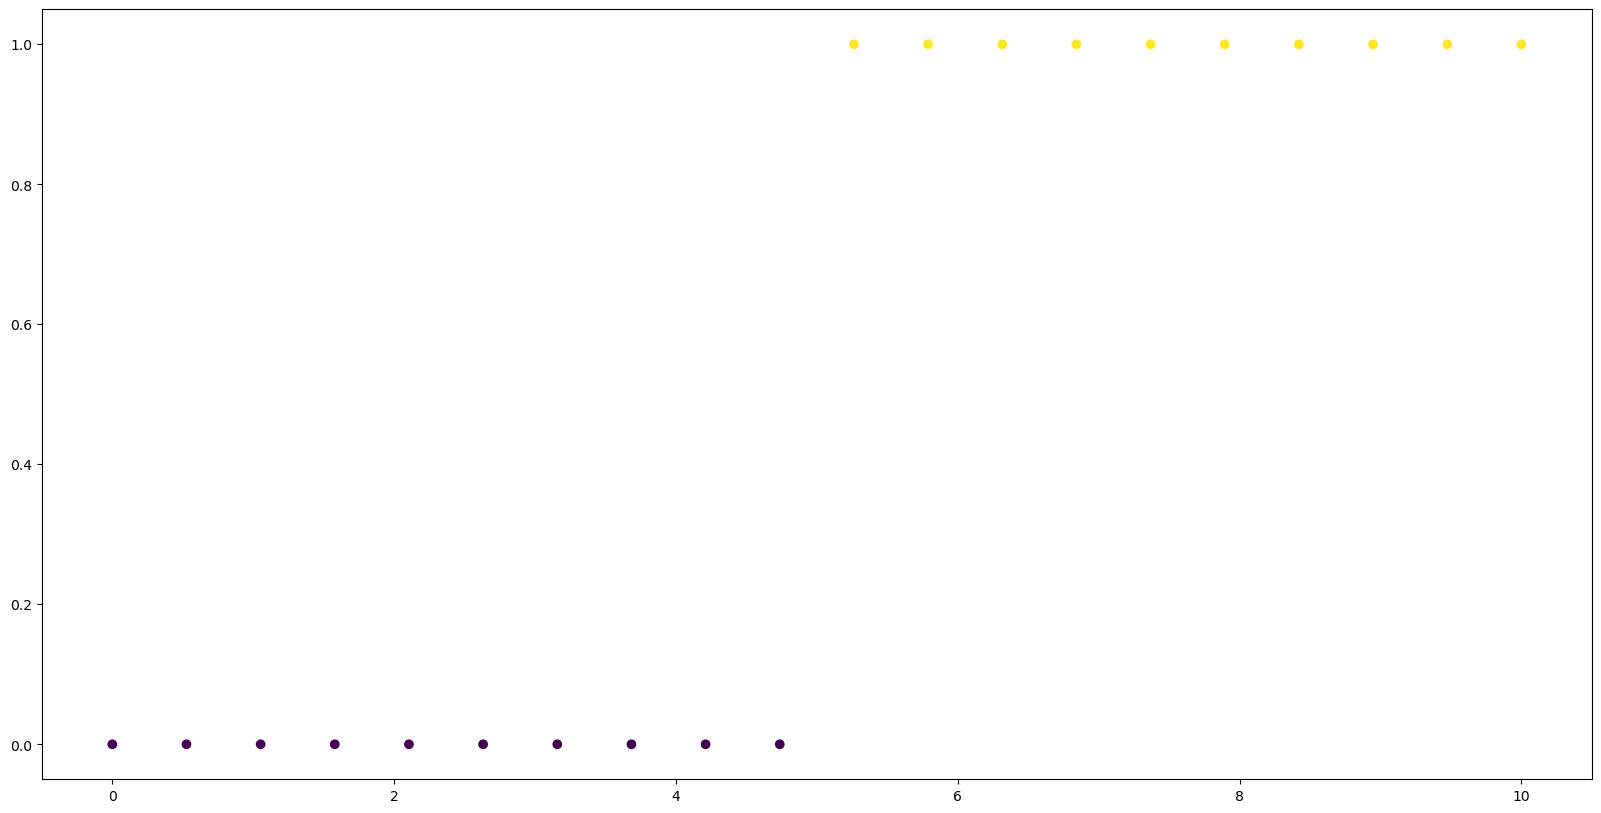

In [3]:
plt.scatter(x, y, c=y)


In [4]:
model = LogisticRegression()


In [5]:
model.fit(x.reshape(-1, 1),y)


LogisticRegression()

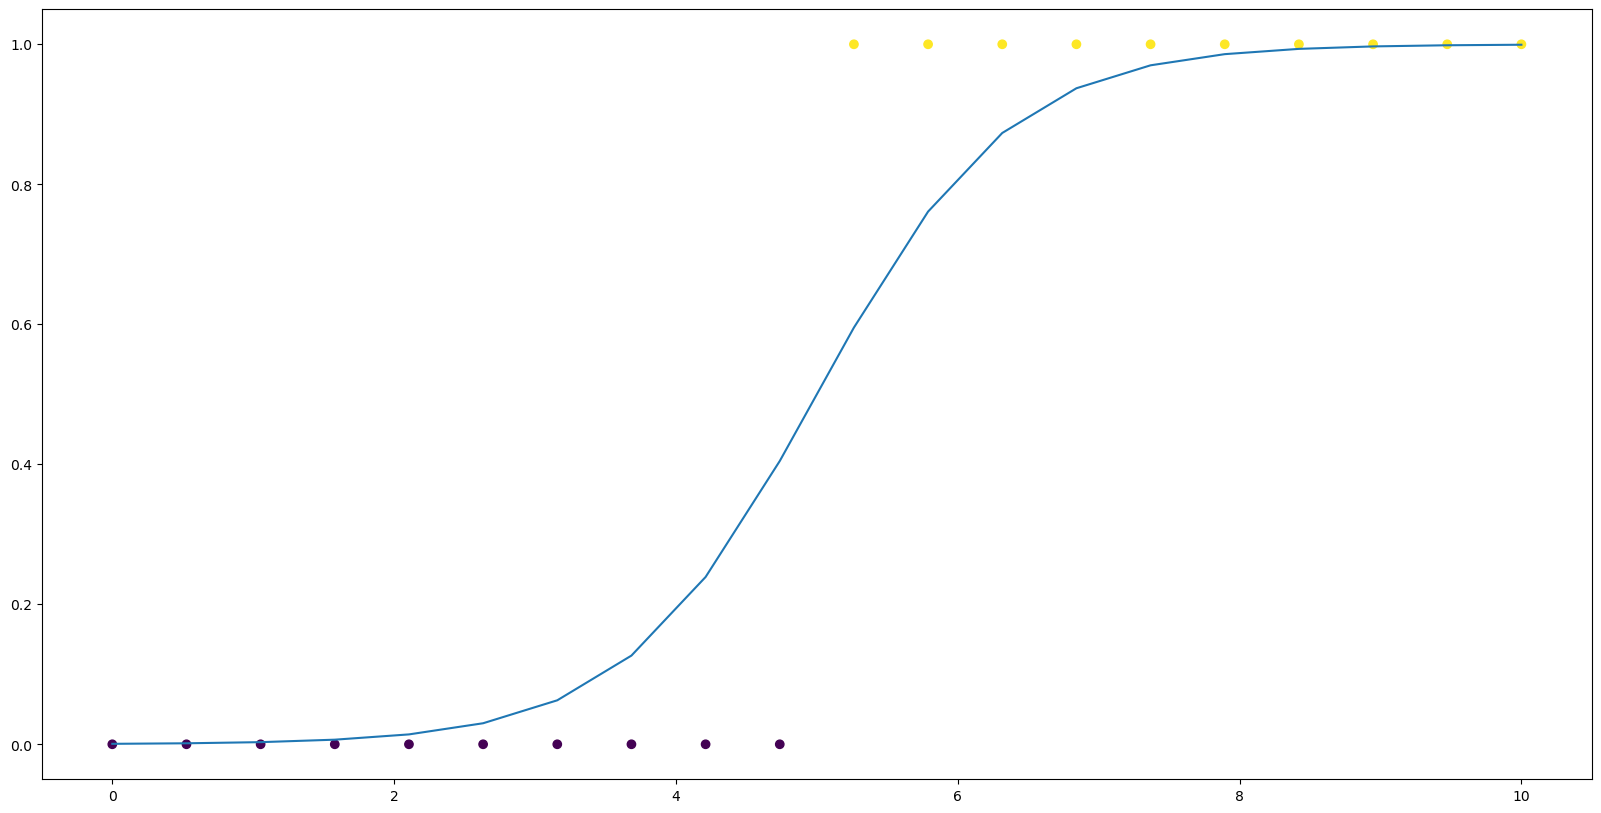

In [6]:
plt.scatter(x,y, c=y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1))[:,1])


In [7]:
b, b0 = model.coef_, model.intercept_
model.coef_, model.intercept_


(array([[1.46709085]]), array([-7.33542562]))

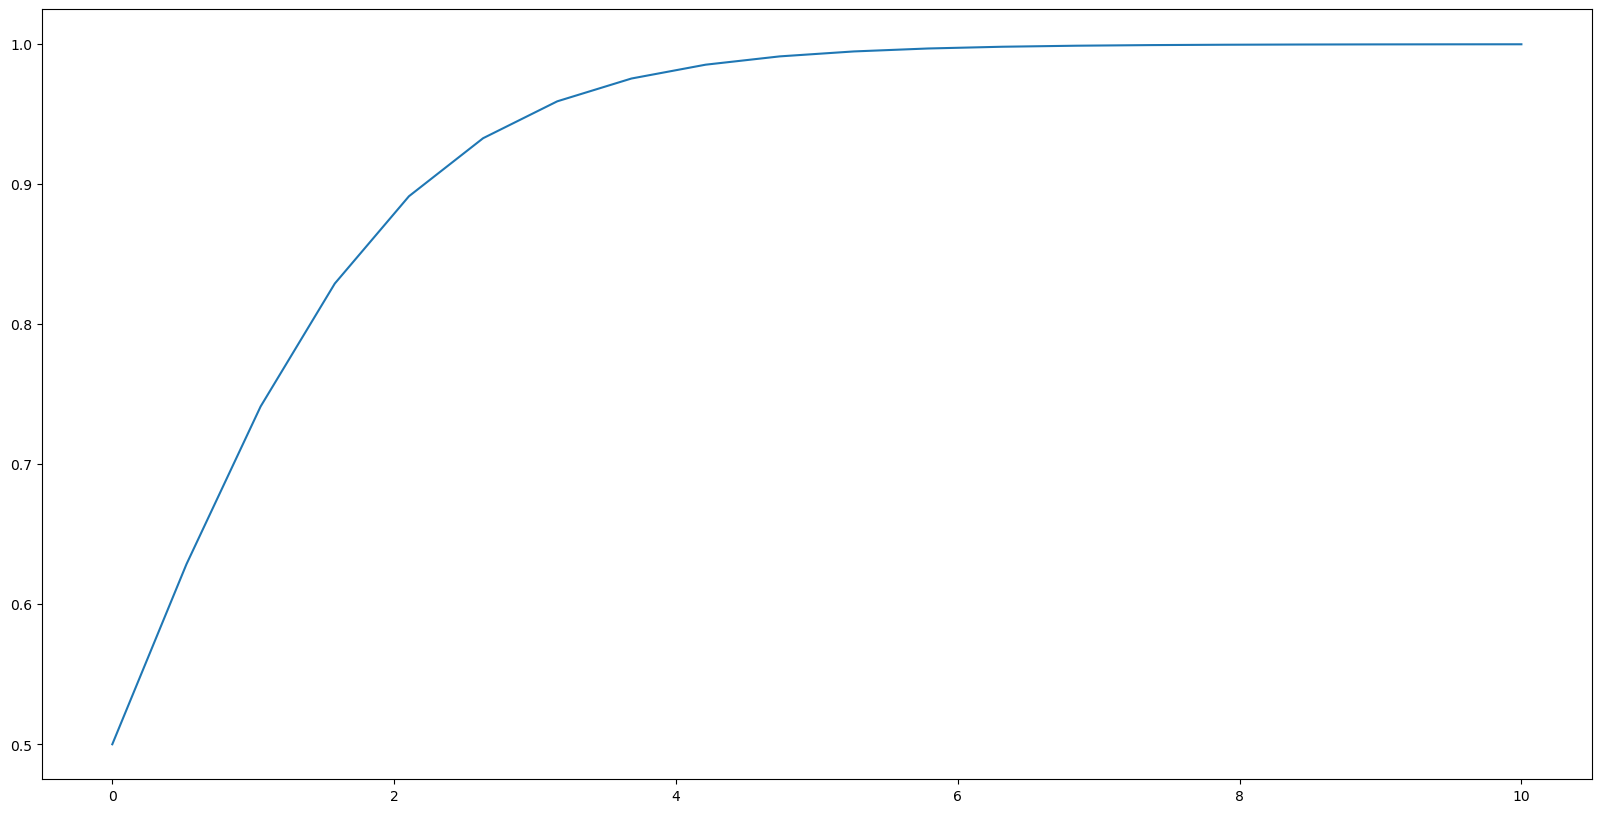

In [8]:
plt.plot(x, 1/(1+np.exp(-x)))


In [9]:
b


array([[1.46709085]])

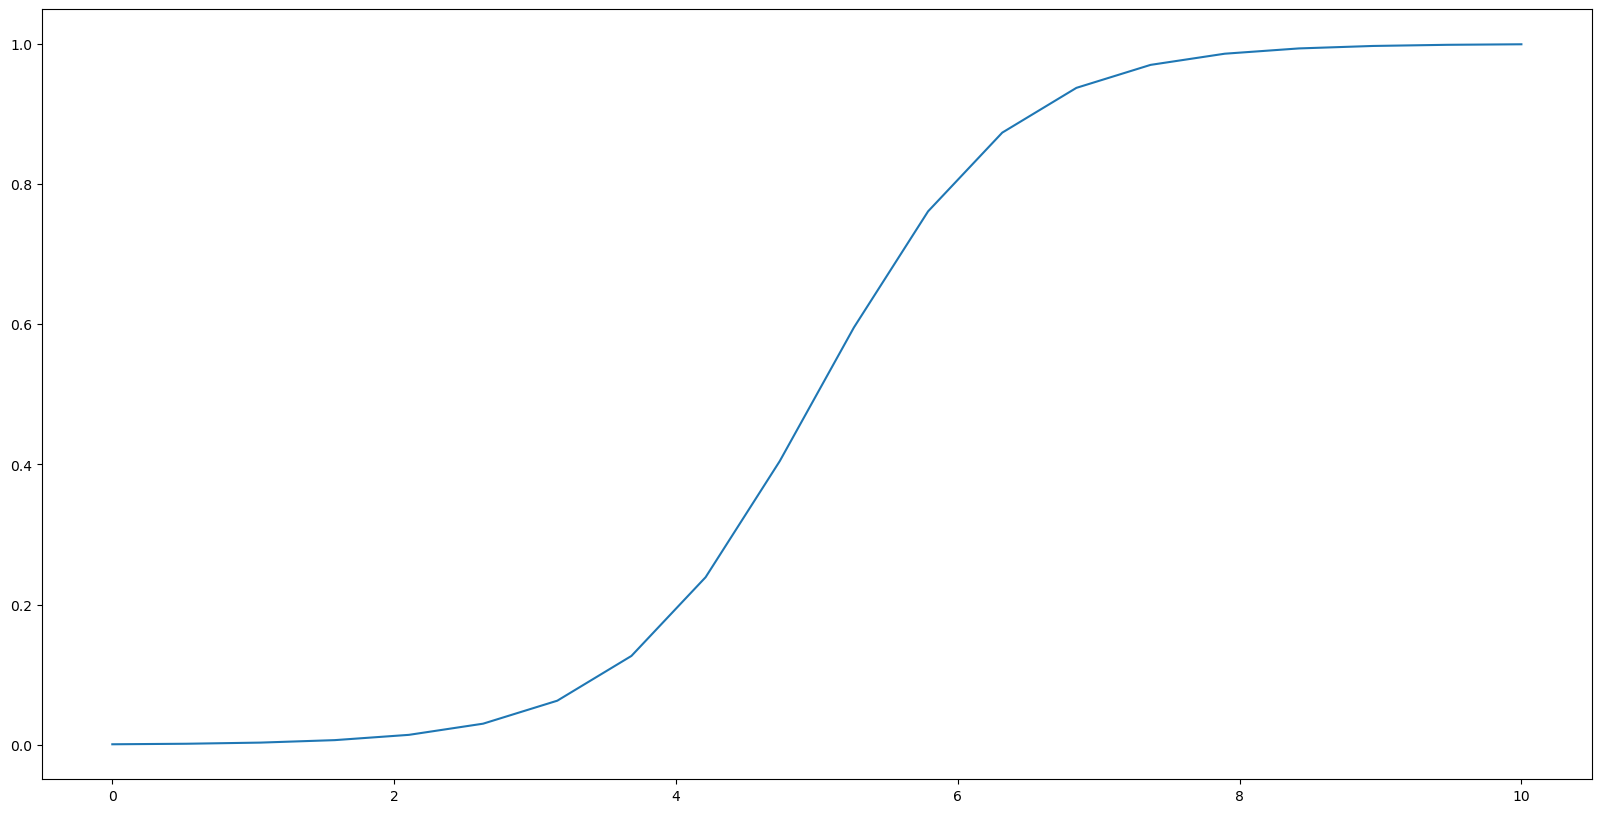

In [10]:
plt.plot(x, 1/(1+np.exp(-(b[0]*x +b0))))


C:\Users\Michael\AppData\Local\Temp\ipykernel_9076\290434025.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


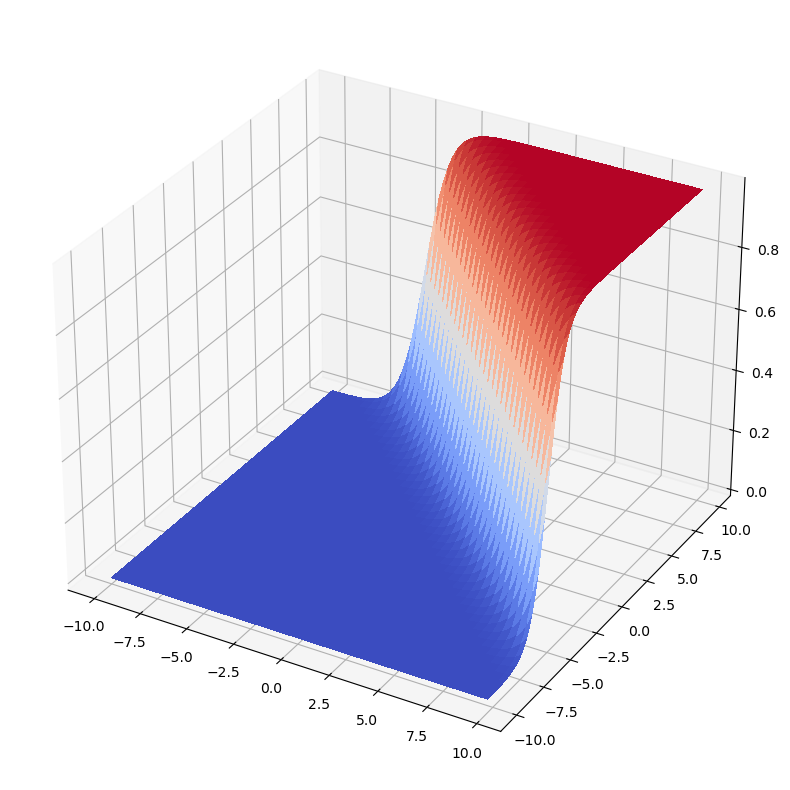

In [11]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = 1/(1+np.exp(-(b[0]*X +b[0]*Y +b0)))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [12]:
X


array([[-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       ...,
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75]])

In [13]:
Y


array([[-10.  , -10.  , -10.  , ..., -10.  , -10.  , -10.  ],
       [ -9.75,  -9.75,  -9.75, ...,  -9.75,  -9.75,  -9.75],
       [ -9.5 ,  -9.5 ,  -9.5 , ...,  -9.5 ,  -9.5 ,  -9.5 ],
       ...,
       [  9.25,   9.25,   9.25, ...,   9.25,   9.25,   9.25],
       [  9.5 ,   9.5 ,   9.5 , ...,   9.5 ,   9.5 ,   9.5 ],
       [  9.75,   9.75,   9.75, ...,   9.75,   9.75,   9.75]])

What if the data doesn't really fit this pattern?

In [14]:
y = np.concatenate([np.zeros(10), np.ones(10), np.zeros(10)])
x = np.linspace(0, 10, len(y))


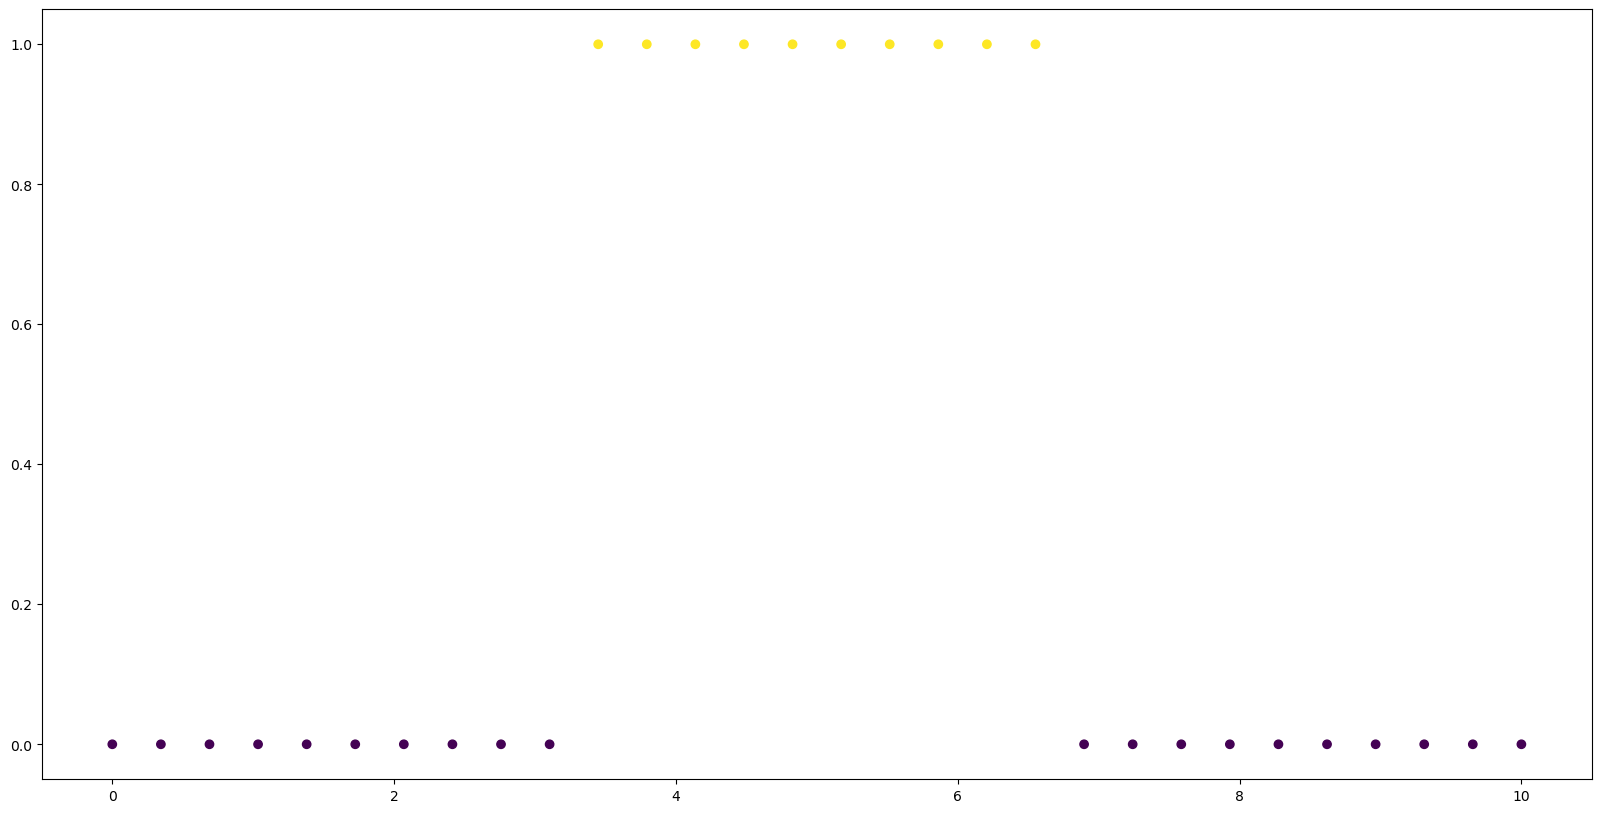

In [15]:
plt.scatter(x,y, c=y)


In [16]:
model.fit(x.reshape(-1, 1),y)


LogisticRegression()

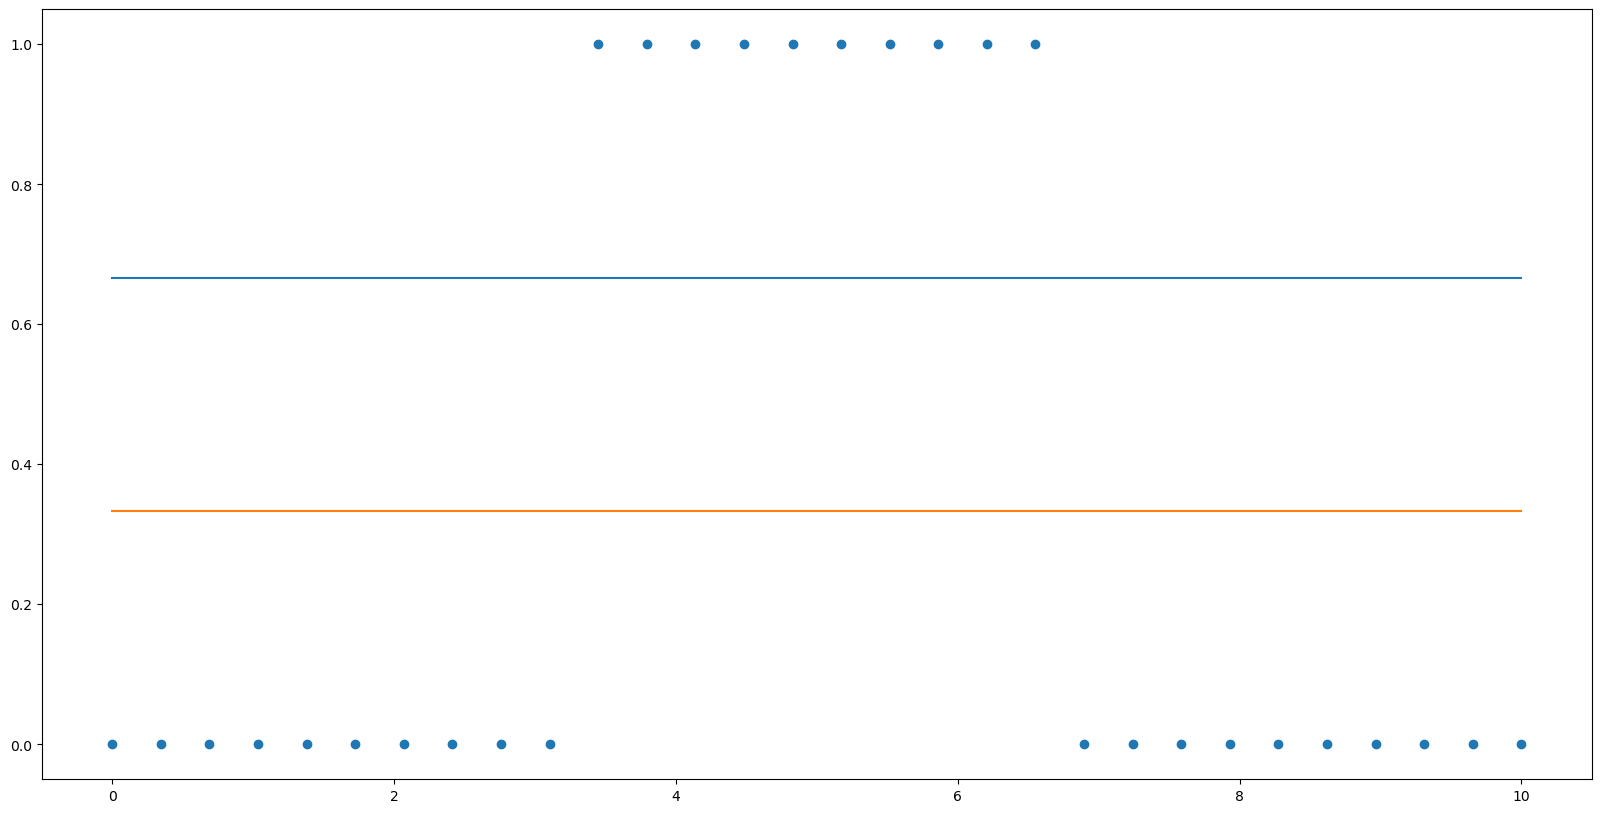

In [17]:
plt.scatter(x,y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1)))


In [18]:
model1 = LogisticRegression()
model1.fit(x[:15].reshape(-1, 1),y[:15])


LogisticRegression()

In [19]:
model2 = LogisticRegression()
model2.fit(x[15:].reshape(-1, 1),y[15:])


LogisticRegression()

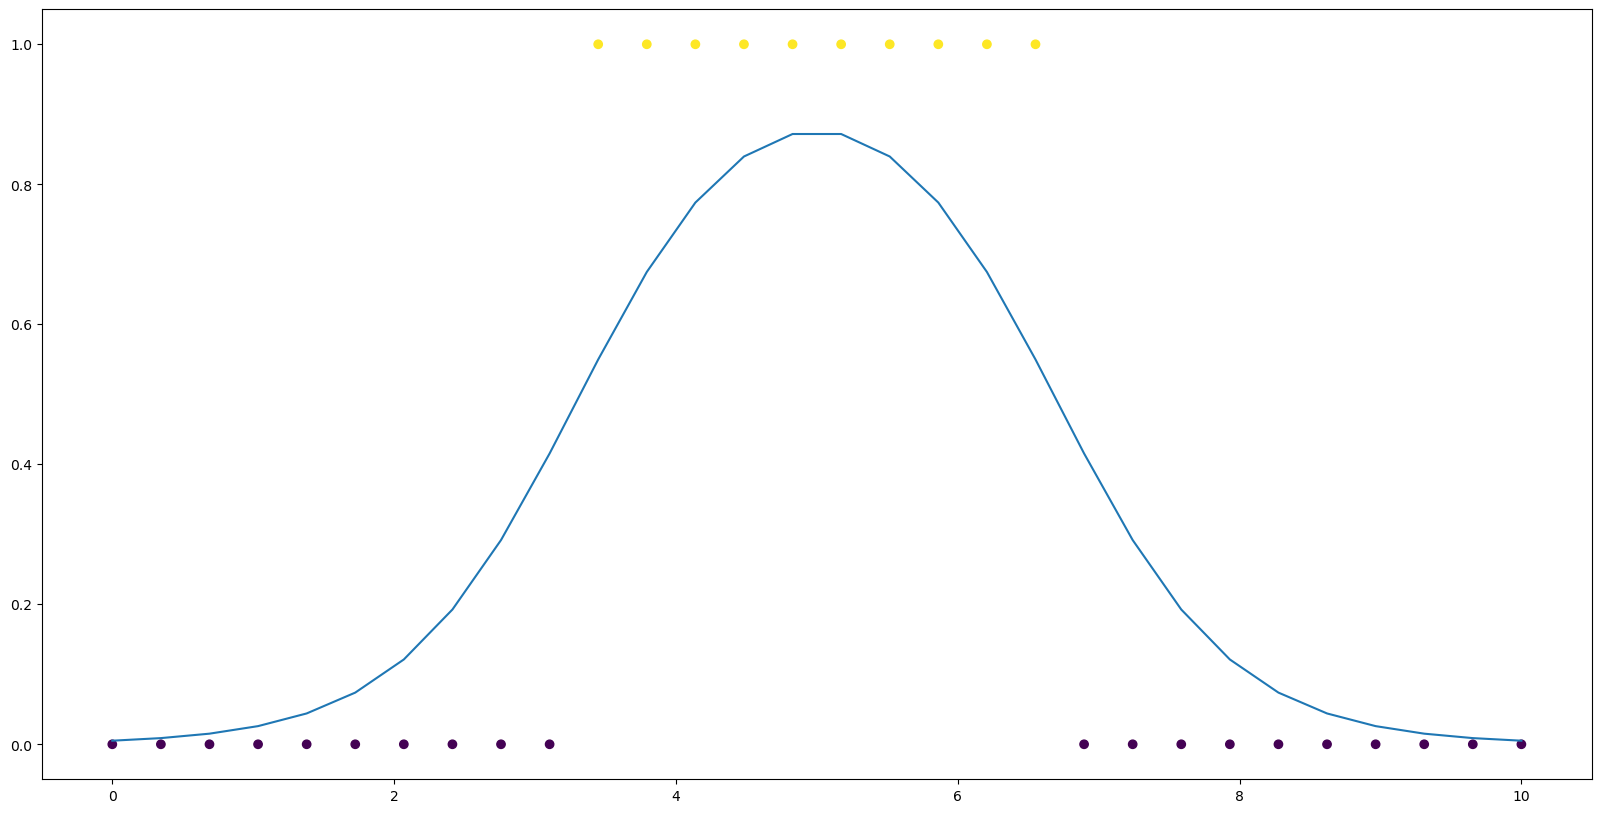

In [20]:
plt.scatter(x,y, c=y)
plt.plot(x, model1.predict_proba(x.reshape(-1, 1))[:,1] * model2.predict_proba(x.reshape(-1, 1))[:,1])


In [22]:
df = pd.read_csv('C:\\Users\\Michael\\Downloads\\adult.data', index_col=False)
golden = pd.read_csv('C:\\Users\\Michael\\Downloads\\adult.test', index_col=False)


In [23]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()


In [24]:
transform_columns = ['sex', 'workclass', 'education', 'marital-status', 
                     'occupation', 'relationship', 'race', 'sex', 
                     'native-country', 'salary']


In [25]:
x = df.copy()

x[transform_columns] = enc.fit_transform(df[transform_columns])

golden['salary'] = golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K')
xt = golden.copy()

xt[transform_columns] = enc.transform(golden[transform_columns])


In [26]:
df.salary.unique()


array([' <=50K', ' >50K'], dtype=object)

In [27]:
golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K').unique()


array([' <=50K', ' >50K'], dtype=object)

In [36]:
model.fit(preprocessing.scale(x.drop('salary', axis=1)), x.salary)


LogisticRegression()

In [29]:
pred = model.predict(preprocessing.scale(x.drop('salary', axis=1)))
pred_test = model.predict(preprocessing.scale(xt.drop('salary', axis=1)))


In [30]:
x.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0


In [31]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, auc, roc_curve
)


In [32]:
accuracy_score(x.salary, pred)


0.8250360861152913

In [33]:
confusion_matrix(x.salary, pred)


array([[23300,  1420],
       [ 4277,  3564]], dtype=int64)

In [34]:
print(classification_report(x.salary, pred))


              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     24720
         1.0       0.72      0.45      0.56      7841

    accuracy                           0.83     32561
   macro avg       0.78      0.70      0.72     32561
weighted avg       0.81      0.83      0.81     32561



In [35]:
print(classification_report(xt.salary, pred_test))


              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     12435
         1.0       0.70      0.45      0.55      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.69      0.72     16281
weighted avg       0.81      0.82      0.81     16281



# Assignment 

## 1. Use your own dataset (`Heart.csv` is acceptable), create a train and a test set,  and build 2 models: Logistic Regression and Decision Tree (shallow). Compare the test results using `classification_report` and `confusion_matrix`. Explain which algorithm is optimal
## 2. Repeat 1. but let the Decision Tree be much deeper to allow over-fitting. Compare the two models' test results again, and explain which is optimal

In [14]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Read the stars.csv and generate two dataframes, one as stars and one as golden_stars
stars = pd.read_csv('C:\\Users\\Michael\\Desktop\\MLData\\stars.csv')
golden_stars = pd.read_csv('C:\\Users\\Michael\\Desktop\\MLData\\stars.csv')

#Identify/tag the categorical variables in the dataset to transform
cvariables = ['Color', 'Spectral_Class']

#Use OneHotEncoder to transform the categorical categories that are a part of cvariables ('Color' and 'Spectral_Class')
OH = OneHotEncoder(handle_unknown="ignore", sparse=False)
OHcategory = OH.fit_transform(stars[cvariables])
OHcategorygolden = OH.transform(golden_stars[cvariables])

# Create two dataframes that contain the transformed categorical values (we will integrate this dataframe with the two previously constructed at the beginning)
Tcategories = OH.get_feature_names_out(cvariables)
StarsTcategories = pd.DataFrame(OHcategory, columns=Tcategories)
GstarsTcategories = pd.DataFrame(OHcategorygolden, columns=Tcategories)

#Concatenate transformed categorical dataframes with their respective dataframes
Tstars = pd.concat([stars.drop(cvariables, axis=1), StarsTcategories], axis=1)
Tgstars = pd.concat([golden_stars.drop(cvariables, axis=1), GstarsTcategories], axis=1)

#Identify dependent variable of interest that we would like to predict
Train_y = Tstars['Type']
Test_y = Tgstars['Type']

#Split the data into training and testing sets (train on Tstars dataframe)
Train_x, Test_x, Train_y, Test_y = train_test_split(Tstars.drop('Type', axis=1), Train_y, test_size=0.3)

#Logistic Regression model (define and fit to the training data + generate prediction values/performance metrics)
STpred_log = Logistic.predict(preprocessing.scale(Test_x))
gSTpred_log = Logistic.predict(preprocessing.scale(Tgstars.drop('Type', axis=1)))
print("Logistic Regression - Test Set Performance")
print("Accuracy Score:", accuracy_score(Test_y, STpred_log))
print(classification_report(Test_y, STpred_log, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(Test_y, STpred_log))

#Shallow DecisionTree model (define it setting max_depth to 1 + fit to the training data + generate prediction values/performance metrics)
DecisionTreeShallow = DecisionTreeClassifier(max_depth=1)
DecisionTreeShallow.fit(preprocessing.scale(Train_x), Train_y)
STpred_decision = DecisionTreeShallow.predict(preprocessing.scale(Test_x))
gSTpred_decision = DecisionTreeShallow.predict(preprocessing.scale(Tgstars.drop('Type', axis=1)))
print("Decision Tree - Test Set Performance ")
print("Accuracy Score:", accuracy_score(Test_y, STpred_decision))
print(classification_report(Test_y, STpred_decision, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(Test_y, STpred_decision))


Logistic Regression - Test Set Performance
Accuracy Score: 0.9305555555555556
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       1.00      0.38      0.55         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        12

    accuracy                           0.93        72
   macro avg       0.96      0.90      0.90        72
weighted avg       0.95      0.93      0.92        72

Confusion Matrix:
 [[14  0  0  0  0  0]
 [ 5  3  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 18  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]
Decision Tree - Test Set Performance 
Accuracy Score: 0.20833333333333334
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        14
           1       0.14      0.88      0.25       

In [15]:
print("With regards to being able to predict the classification of a star, I believe that the logistic regression model is the optimal choice. With regards to the particular analysis, the logistic regression model yielded higher values associated with the precision, recall, and F1 score. Furthermore, it yielded a lower frequency of Type 1 and Type 2 errors when compared to the shallow decision tree model.")

With regards to being able to predict the classification of a star, I believe that the logistic regression model is the optimal choice. With regards to the particular analysis, the logistic regression model yielded higher values associated with the precision, recall, and F1 score. Furthermore, it yielded a lower frequency of Type 1 and Type 2 errors when compared to the shallow decision tree model.


In [13]:
#Logistic Regression model (define and fit to the training data + generate prediction values/performance metrics)
Logistic2 = LogisticRegression()
Logistic2.fit(preprocessing.scale(Train_x), Train_y)
STpred_log2 = Logistic2.predict(preprocessing.scale(Test_x))
gSTpred_log2 = Logistic2.predict(preprocessing.scale(Tgstars.drop('Type', axis=1)))
print("Logistic Regression - Test Set Performance")
print("Accuracy Score:", accuracy_score(Test_y, STpred_log2))
print(classification_report(Test_y, STpred_log2, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(Test_y, STpred_log2))

#Deep DecisionTree model (define it setting max_depth to 10 + fit to the training data + generate prediction values/performance metrics)
DecisionTreeDeep = DecisionTreeClassifier(max_depth=10)
DecisionTreeDeep.fit(preprocessing.scale(Train_x), Train_y)
STpred_decision2 = DecisionTreeDeep.predict(preprocessing.scale(Test_x))
gSTpred_decision2 = DecisionTreeDeep.predict(preprocessing.scale(Tgstars.drop('Type', axis=1)))
print("Decision Tree - Test Set Performance ")
print("Accuracy Score:", accuracy_score(Test_y, STpred_decision2))
print(classification_report(Test_y, STpred_decision2, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(Test_y, STpred_decision2))


Logistic Regression - Test Set Performance
Accuracy Score: 0.9583333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       1.00      0.80      0.89        15
           4       0.77      1.00      0.87        10
           5       1.00      1.00      1.00         9

    accuracy                           0.96        72
   macro avg       0.96      0.97      0.96        72
weighted avg       0.97      0.96      0.96        72

Confusion Matrix:
 [[14  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0 12  3  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  9]]
Decision Tree - Test Set Performance 
Accuracy Score: 0.5972222222222222
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.46      1.00      0.63        

In [16]:
print("The second part of this assignment asked us to create a deeper decision tree model, which I accomplished by setting the max_depth value to 10 (it was previously set at 1 for the previous question, as that required a shallow decision tree model). Once that modification was executed properly and I was able to obtain the evaluation metrics, I was finally able to determine which is the optimal algorithm with regards to being able to predict the classification of a star. With that being said, the winning algorithm is once again the logistic regression model. I say this because the logistic regression model is superior when discussing the precision, recall, and F1 score. Once again, just like the previous question, the logistic regression model yielded a lower frequency of Type 1 and Type 2 errors when compared to the deeper decision tree model.")

The second part of this assignment asked us to create a deeper decision tree model, which I accomplished by setting the max_depth value to 10 (it was previously set at 1 for the previous question, as that required a shallow decision tree model). Once that modification was executed properly and I was able to obtain the evaluation metrics, I was finally able to determine which is the optimal algorithm with regards to being able to predict the classification of a star. With that being said, the winning algorithm is once again the logistic regression model. I say this because the logistic regression model is superior when discussing the precision, recall, and F1 score. Once again, just like the previous question, the logistic regression model yielded a lower frequency of Type 1 and Type 2 errors when compared to the deeper decision tree model.
